In [73]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Format the data to pandas time series 

In [74]:
df_2016 = pd.read_excel("DK1_2016_import.xlsx")
print(df_2016.head(10))

         Day  Hour      l   l_up  l_down  y_wind_tot
0 2016-01-01     0  16.39  17.00   16.39        1314
1 2016-01-01     1  16.04  17.00   16.04        1267
2 2016-01-01     2  15.74  15.74   15.74        1159
3 2016-01-01     3  15.57  15.57   15.57        1160
4 2016-01-01     4  15.47  15.47   15.47        1069
5 2016-01-01     5  15.75  15.75   15.75        1013
6 2016-01-01     6  15.36  15.36   15.36         881
7 2016-01-01     7  15.37  15.37   13.01         752
8 2016-01-01     8  15.19  15.19   13.01         578
9 2016-01-01     9  15.39  15.39   13.01         487


In [75]:
#Convert day to datetime type
pd.to_datetime(df_2016["Day"])
df_2016.dtypes

Day           datetime64[ns]
Hour                   int64
l                    float64
l_up                 float64
l_down               float64
y_wind_tot             int64
dtype: object

In [76]:
#Merge day and hour into a datetime variable "Date"
df_2016["Date"] = df_2016["Day"]+pd.to_timedelta(df_2016["Hour"],unit='h')
df_2016.set_index("Date",inplace=True)
df_2016.head(10)

,Day,Hour,l,l_up,l_down,y_wind_tot
Date,,,,,,
2016-01-01 00:00:00,2016-01-01,0,16.39,17.00,16.39,1314
2016-01-01 01:00:00,2016-01-01,1,16.04,17.00,16.04,1267
2016-01-01 02:00:00,2016-01-01,2,15.74,15.74,15.74,1159
2016-01-01 03:00:00,2016-01-01,3,15.57,15.57,15.57,1160
2016-01-01 04:00:00,2016-01-01,4,15.47,15.47,15.47,1069
2016-01-01 05:00:00,2016-01-01,5,15.75,15.75,15.75,1013
2016-01-01 06:00:00,2016-01-01,6,15.36,15.36,15.36,881
2016-01-01 07:00:00,2016-01-01,7,15.37,15.37,13.01,752
2016-01-01 08:00:00,2016-01-01,8,15.19,15.19,13.01,578


# Estimating the hourly wind production from our plant in 2016

In [77]:
#Create column for capacity factor
df_2016["C"] = 0

In [78]:
df_2016.head(10)

,Day,Hour,l,l_up,l_down,y_wind_tot,C
Date,,,,,,,
2016-01-01 00:00:00,2016-01-01,0,16.39,17.00,16.39,1314,0
2016-01-01 01:00:00,2016-01-01,1,16.04,17.00,16.04,1267,0
2016-01-01 02:00:00,2016-01-01,2,15.74,15.74,15.74,1159,0
2016-01-01 03:00:00,2016-01-01,3,15.57,15.57,15.57,1160,0
2016-01-01 04:00:00,2016-01-01,4,15.47,15.47,15.47,1069,0
2016-01-01 05:00:00,2016-01-01,5,15.75,15.75,15.75,1013,0
2016-01-01 06:00:00,2016-01-01,6,15.36,15.36,15.36,881,0
2016-01-01 07:00:00,2016-01-01,7,15.37,15.37,13.01,752,0
2016-01-01 08:00:00,2016-01-01,8,15.19,15.19,13.01,578,0


In [79]:
#Find max wind produced
max_y = max(df_2016["y_wind_tot"])
print("The maximal energy produced from wind in DK1 is: ", max_y)

The maximal energy produced from wind in DK1 is:  3401


In [80]:
#Calculate capacity factor
df_2016.loc[df_2016["l"] >= 0,"C"] = df_2016.loc[df_2016["l"] >= 0,"y_wind_tot"]/max_y

To calculate this capacity factor, only the hours when the spot market price was above 0 are considered. During the rest of the hours, the price is negative, so the producer is not scheduled (as it bids at a price of 0), hence the value of 0 for its capacity factor C.

In [81]:
df_2016[df_2016["C"]==0].head(10)

,Day,Hour,l,l_up,l_down,y_wind_tot,C
Date,,,,,,,
2016-01-03 01:00:00,2016-01-03,1,-0.01,-0.01,-19.44,2772,0.0
2016-01-30 04:00:00,2016-01-30,4,-0.02,-0.02,-0.02,2419,0.0
2016-01-30 05:00:00,2016-01-30,5,-0.04,-0.04,-0.04,2477,0.0
2016-01-30 06:00:00,2016-01-30,6,-2.97,-2.97,-2.97,2500,0.0
2016-01-31 04:00:00,2016-01-31,4,-0.27,-0.27,-0.27,2515,0.0
2016-02-02 02:00:00,2016-02-02,2,-2.66,14.90,-2.66,2715,0.0
2016-02-02 03:00:00,2016-02-02,3,-1.92,14.90,-1.92,2685,0.0
2016-02-09 00:00:00,2016-02-09,0,-2.65,16.00,-2.65,1538,0.0
2016-02-09 01:00:00,2016-02-09,1,-0.71,16.00,-0.71,1558,0.0


In [82]:
#Calculate estimated production from our wind power plant
y_max = 160
df_2016["y"]=df_2016["C"]*y_max
df_2016.head(10)

,Day,Hour,l,l_up,l_down,y_wind_tot,C,y
Date,,,,,,,,
2016-01-01 00:00:00,2016-01-01,0,16.39,17.00,16.39,1314,0.386357,61.817113
2016-01-01 01:00:00,2016-01-01,1,16.04,17.00,16.04,1267,0.372537,59.605998
2016-01-01 02:00:00,2016-01-01,2,15.74,15.74,15.74,1159,0.340782,54.525140
2016-01-01 03:00:00,2016-01-01,3,15.57,15.57,15.57,1160,0.341076,54.572185
2016-01-01 04:00:00,2016-01-01,4,15.47,15.47,15.47,1069,0.314319,50.291091
2016-01-01 05:00:00,2016-01-01,5,15.75,15.75,15.75,1013,0.297854,47.656572
2016-01-01 06:00:00,2016-01-01,6,15.36,15.36,15.36,881,0.259041,41.446633
2016-01-01 07:00:00,2016-01-01,7,15.37,15.37,13.01,752,0.221111,35.377830
2016-01-01 08:00:00,2016-01-01,8,15.19,15.19,13.01,578,0.169950,27.192002


# Determining the revenues from the markets in 2016

To determine the revenues from the markets, we need to know the balancing state of the whole system at each time unit:

In [83]:
df_2016.loc[df_2016["l_up"]==df_2016["l_down"],"dP"]=0
df_2016.loc[df_2016["l_up"]-df_2016["l"]>=df_2016["l"]-df_2016["l_down"],"dP"]=-1
df_2016.loc[df_2016["l_up"]-df_2016["l"]<df_2016["l"]-df_2016["l_down"],"dP"]=1

In [84]:
#Check the df
df_2016.head(10)

,Day,Hour,l,l_up,l_down,y_wind_tot,C,y,dP
Date,,,,,,,,,
2016-01-01 00:00:00,2016-01-01,0,16.39,17.00,16.39,1314,0.386357,61.817113,-1.0
2016-01-01 01:00:00,2016-01-01,1,16.04,17.00,16.04,1267,0.372537,59.605998,-1.0
2016-01-01 02:00:00,2016-01-01,2,15.74,15.74,15.74,1159,0.340782,54.525140,-1.0
2016-01-01 03:00:00,2016-01-01,3,15.57,15.57,15.57,1160,0.341076,54.572185,-1.0
2016-01-01 04:00:00,2016-01-01,4,15.47,15.47,15.47,1069,0.314319,50.291091,-1.0
2016-01-01 05:00:00,2016-01-01,5,15.75,15.75,15.75,1013,0.297854,47.656572,-1.0
2016-01-01 06:00:00,2016-01-01,6,15.36,15.36,15.36,881,0.259041,41.446633,-1.0
2016-01-01 07:00:00,2016-01-01,7,15.37,15.37,13.01,752,0.221111,35.377830,1.0
2016-01-01 08:00:00,2016-01-01,8,15.19,15.19,13.01,578,0.169950,27.192002,1.0


In [85]:
#Check if there are NAs
df_2016.loc[df_2016["dP"].isnull()]

,Day,Hour,l,l_up,l_down,y_wind_tot,C,y,dP
Date,,,,,,,,,


In [86]:
def revenues(bid,df):
    #Calculates total revenues (day-ahead+balance) in 2016 when bidding at a constant value bid

    df["rDA"]=bid*df["l"]

    bal = df["dP"]==0            #No system inbalance
    df.loc[bal,"rB"] = 0      #No revenue from balancing market

    neg_neg = (bid>df["y"])&(df["dP"]==-1)     #Both consumers and producers have negative inbalance
    df.loc[neg_neg,"rB"] = -(bid-df.loc[neg_neg,"y"])*df.loc[neg_neg,"l_up"]     # Consumer penalized

    neg_pos = (bid>df["y"])&(df["dP"]>=0)      #Consumer has negative inbalance but system has positive or no inbalance 
    df.loc[neg_pos,"rB"] = -(bid-df.loc[neg_pos,"y"])*df.loc[neg_pos,"l"]     # Consumer not penalized

    pos_pos = (bid<df["y"])&(df["dP"]==1)      #Both consumers and producers have positive inbalance
    df.loc[pos_pos,"rB"] = (df.loc[pos_pos,"y"]-bid)*df.loc[pos_pos,"l_down"]     # Consumer penalized

    pos_neg = (bid<df["y"])&(df["dP"]<=0)      #Consumer has positive inbalance but system has negative or no inbalance
    df.loc[pos_neg,"rB"] = (df.loc[pos_neg,"y"]-bid)*df.loc[pos_neg,"l"]     # Consumer not penalized

    rDA_tot = sum(df["rDA"])
    rB_tot = sum(df["rB"])
    r_tot = rDA_tot+rB_tot
    return(r_tot)

Our producer bids at its marginal costs, i.e. at 0. This means that when the spot market price is below 0, we are not scheduled - and we don't get any revenues from any of the markets. To account for this in the calculation of the revenues, a new dataframe df_2016_sch is created with only the hours when we are scheduled.

In [87]:
#Dataframe with only the hours when we are scheduled (i.e when the market price is positive)
df_2016_sch = df_2016.loc[df_2016["l"]>=0]

In [88]:
print("df_2016:",df_2016.shape,"df_2016_sch:",df_2016_sch.shape)

df_2016: (8784, 9) df_2016_sch: (8722, 9)


In [89]:
#Example
revenues(30,df_2016_sch)

C:\Users\rlahl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\rlahl\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\rlahl\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

9825026.49626581

# Finding the optimal bid

In [90]:
#Revenues depending on bid (WARNING: Takes some time (approx 10sec on my computer))
list_rev = list()
list_bid = [i for i in range(0,160)]
for i in range(0,160):
    list_rev.append(revenues(i,df_2016_sch))

C:\Users\rlahl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [91]:
#Export to excel
df_rev = pd.DataFrame({"Bid": list_bid, "Revenues": list_rev})
#df_rev.to_csv("revenues_s1.csv", sep=',',index=False)

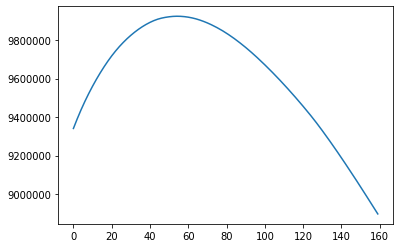

In [92]:
plt.plot(list_bid,list_rev)

In [93]:
max_rev = max(df_rev["Revenues"])
print("The maximal revenue is: ", max_rev)

The maximal revenue is:  9924105.908967936


In [94]:
bid_opt = df_rev.loc[df_rev["Revenues"]==max_rev]["Bid"]
print("The optimal bid is: ", bid_opt.values[0])

The optimal bid is:  54


# Results analysis

The mean value of energy produced by our producer is: 50.0


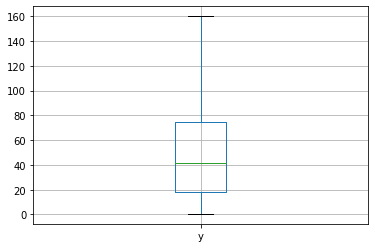

In [95]:
df_2016_sch.boxplot(column="y",)
mean_y = df_2016_sch["y"].sum()//len(df_2016_sch["y"])
print("The mean value of energy produced by our producer is:", mean_y)

It can be seen that the optimal bid (54 MWh) is higher than both the median and the mean of the hourly energy produced. This means that, in general, it is more beneficial for the producer to bid higher than what it produces.

In [96]:
# In my example the bidding quantity are taken from the Wind Data :
BidData = pd.read_excel('WindForecast_DA_12.xlsx')
print(BidData.columns)                                         # To check the import

Index(['day', 'hour', 'dato', 'dati', 'ForeTime', 'hors', 'meas', 'fore', 'q5',
       'q10', 'q15', 'q20', 'q25', 'q30', 'q35', 'q40', 'q45', 'q50', 'q55',
       'q60', 'q65', 'q70', 'q75', 'q80', 'q85', 'q90', 'q95'],
      dtype='object')


# Calculation code :

### Data :

#### Import Data :

In [97]:
# Import data for measurements and forecast made at 12:00 Day-1 :
WindData = pd.read_excel('WindForecast_DA_12.xlsx')

# Import market price data for 2017 from Nordpool :
SpotData = pd.read_excel('DK1_2017.xlsx')

# Check : Print the name of the excel file columns
print(WindData.columns)
print(SpotData.columns)

Index(['day', 'hour', 'dato', 'dati', 'ForeTime', 'hors', 'meas', 'fore', 'q5',
       'q10', 'q15', 'q20', 'q25', 'q30', 'q35', 'q40', 'q45', 'q50', 'q55',
       'q60', 'q65', 'q70', 'q75', 'q80', 'q85', 'q90', 'q95'],
      dtype='object')
Index(['Unnamed: 0', 'Hours', 'Clearing', 'Up', 'Down'], dtype='object')


#### Extract meaningful parts :

In [98]:
# Wind power measure, in kW :
Measure = WindData['meas']

# Market clearing price, in €/MWh :
LambdaS = SpotData['Clearing']

# Extract market regulation price, in €/MWh :
LambdaUP = SpotData['Up']
LambdaDOWN = SpotData['Down']

# Number of time units :
L = len(Measure)

### Bid for strategy 1

In [99]:
BID = [54000]*L

#### Market properties :

We build an indicator dP which will give the sign for the type of regulation needed for the market:

#dP = -1 for down-regulation

#dP = 1 for up-regulation

#dP = 0 when the market is perfectly balanced

In [100]:
dP = [0]*L
for k in range (0, L, 1) :
    lambda_up = LambdaUP[k]
    lambda_down = LambdaDOWN[k]
    lambdaS = LambdaS[k]
    
    up = lambda_up - lambdaS      # lambda_up >= lambdaS
    down = lambdaS - lambda_down  # lambda_down <= lambdaS
    
    if lambda_up == lambda_down:
        dP[k] = 0
    elif up > down :
        dP[k] = -1                # Need of upward regulation, negative imbalance
    else :
        dP[k] = 1                 # Need of downward regulation, positiv imbalance


Now we can determine the balancing price LambdaB according to the market imbalance :

In [101]:
LambdaB = [0]*L
for k in range (0, L, 1):
    dp = dP[k]
    if dp < 0 :
        LambdaB[k] = LambdaUP[k]     # Upward regulation
    elif dp > 0 :
        LambdaB[k] = LambdaDOWN[k]   # Downward regulation
    else :
        LambdaB[k] = LambdaS[k]      # Balanced Market


Adapt bid and real values when the producer is not scheduled :

In [102]:
RealBID = [0]*L
RealMEAS = [0]*L

for k in range (0,L,1):
    if LambdaS[k] < 0:
        RealBID[k] = 0
        RealMEAS[k] = 0
    else :
        RealBID[k] = BID[k]
        RealMEAS[k]= Measure[k]

#### Individual imbalance :

An indicator of the producer imbalance is defined similarly to the Market imbalance indicator dP :

In [103]:
SURPLUS = [0]*L      # Production surplus at time t, in kW
LACK = [0]*L         # Lack of production at time t, in kW
IMBAL = [0]*L        # Imbalance indicator

for k in range (0, L, 1) :
    real = RealMEAS[k]
    bid = RealBID[k]
    
    if real > bid :
        IMBAL[k] = 1              # The producer produces more than forecasted, his imbalance is positiv.
        SURPLUS[k] = real-bid
        LACK[k] = 0
    elif real < bid :
        IMBAL[k] = -1             # The producer doesn't produce enough, his imbalance is negativ.
        SURPLUS[k] = 0
        LACK[k] = real-bid       
    else :
        IMBAL[k] = 0              # The production bid was exact.
        SURPLUS[k] = 0
        LACK[k] = 0

#### Day Ahead Revenue :

In [104]:
RevDA = [0]*L

for k in range (0, L, 1):
    
    if LambdaS[k] >= 0 :
        lambdaS = LambdaS[k]          # 0.001 factor due to conversion from MWh to kWh
        bid = RealBID[k]
        RevDA[k] = lambdaS*bid*0.001

#### Balancing Market Revenue :

In [105]:
RevB = [0]*L              # Revenue of balancing market
LambdaREG = [0]*L         # Regulation price applied, LambdaS or LambdaB

for k in range (0, L, 1):
    real = RealMEAS[k]
    bid = RealBID[k]
    market_imbal = dP[k]
    indiv_imbal = IMBAL[k]
    
    lambdaB = LambdaB[k]
    lambdaS = LambdaS[k]
    
    # Case of upward regulation, the producer helps if he produces more than forecasted ie. his imbalance is positiv
    if market_imbal < 0 :
        if indiv_imbal >= 0 :
            revB = lambdaS*(real-bid)*0.001
            lambdaREG = lambdaS
        else :
            revB = lambdaB*(real-bid)*0.001
            lambdaREG = lambdaB
    # Case of downward regualtion, the producer helps if he produces less than forecasted ie. his imbalance is negativ
    elif market_imbal > 0 :
        if indiv_imbal <= 0 :
            revB = lambdaS*(real-bid)*0.001
            lambdaREG = lambdaS
        else :
            revB = lambdaB*(real-bid)*0.001
            lambdaREG = lambdaB
    # Case of balanced market, the producer's imbalance is not penalized :
    else :
        revB = lambdaS*(real-bid)*0.001
        lambdaREG = lambdaS
    
    RevB[k] = revB
    LambdaREG[k] = lambdaREG

# Results

In [106]:
# Net revenue :
RevNET = [0]*L
for k in range (0,L, 1):
    RevNET[k] = RevDA[k] + RevB[k]

RevNET_annual = sum(RevNET)
print('The net annual revenue is, in €:')
print(RevNET_annual)
print('Composed of a day-ahead revenue, in €:')
print(sum(RevDA))
print('and a balancing revenue, in €:')
print(sum(RevB))

The net annual revenue is, in €:
18319789.655950017
Composed of a day-ahead revenue, in €:
14279355.000000065
and a balancing revenue, in €:
4040434.655949998


In [107]:
# Real generation VS scheduled generation :
RealGene = sum(RealMEAS)*0.001
SchedGene = sum(RealBID)*0.001
print('The annual real generation is, in MWh:')
print(RealGene)
print('Against a annual scheduled generation of, in MWh:')
print(SchedGene)

The annual real generation is, in MWh:
708295.827
Against a annual scheduled generation of, in MWh:
468504.0


In [108]:
# Surplus VS Shortage :
TotSurplus = sum(SURPLUS)*0.001
TotShortage = sum(LACK)*0.001
print('The global generation surplus in 2017 is, in MWh:')
print(TotSurplus)
print('& the global generation shortage in 2017 is, in MWh:')
print(TotShortage)
print('Representing a share of the global production, in %:')
print(100*(TotSurplus-TotShortage)/RealGene)

The global generation surplus in 2017 is, in MWh:
330486.069
& the global generation shortage in 2017 is, in MWh:
-90694.242
Representing a share of the global production, in %:
59.46389840865179


In [109]:
# Imbalance cost :

# Cost of upward regulation, when the producer is in shortage :
UPCOST = [0]*L
# Revenue when downward regulation, when the producer is in surplus :
DOWNCOST = [0]*L

# Opportunity loss cost : when the producer generates less than schedule and have to buy electricity more expensive than its own : :
OPCOST_SHORTAGE = [0]*L
# Opportunity loss cost : when the producer generates more than schedule and sell it for <= price than lambdaS :
OPCOST_SURPLUS = [0]*L

for k in range (0,L,1):
    UPCOST[k]=0.001*LACK[k]*LambdaREG[k]
    DOWNCOST[k]=0.001*SURPLUS[k]*LambdaREG[k]
    
    OPCOST_SHORTAGE[k]=0.001*LACK[k]*(LambdaREG[k]-LambdaS[k])
    OPCOST_SURPLUS[k]=0.001*SURPLUS[k]*(LambdaREG[k]-LambdaS[k])
    
print('The global shortage over the year create a opportunity loss of, in €:')
print(sum(OPCOST_SHORTAGE))
print('The global surplus over the year create a opportunity loss of, in €:')
print(sum(OPCOST_SURPLUS))
print('Giving a global opportunity loss of, in € :')
print(sum(OPCOST_SHORTAGE)+sum(OPCOST_SURPLUS))

# Just to check : The global opportunity loss should be equal to 
# the difference between the net revenue of this strategy and the ideal revenue.

The global shortage over the year create a opportunity loss of, in €:
-316580.49672999984
The global surplus over the year create a opportunity loss of, in €:
-1071642.8798200015
Giving a global opportunity loss of, in € :
-1388223.3765500013


In [110]:
# Average regulation prices per unit :
  
    # Upward and downward regulation, in €/MWh :
avUP = sum(UPCOST)/(0.001*sum(LACK))
avDOWN = sum(DOWNCOST)/(0.001*sum(SURPLUS))


print('The average upward regulation price is, in €/MWh:')
print(avUP)
print('The average downward regulation price is, in €/MWh:')
print(avDOWN)

print('The average energy price, in €/MWh:')
print(sum(RevNET)/RealGene)

The average upward regulation price is, in €/MWh:
39.4837003646824
The average downward regulation price is, in €/MWh:
23.0611201099675
The average energy price, in €/MWh:
25.864601989177068


In [111]:
# Performance ratio
Perf = sum(RevNET)/19715411.37491005
print('The performance ratio of this strategy is:')
print(Perf)

The performance ratio of this strategy is:
0.9292116358912953


# Results analysis

#### Import useful packages

In [112]:
from matplotlib import pyplot as plt
import numpy as np
import math

## Cumulative Net Revenue

In [113]:
CumulRevNET = [0]*L
CumulRevNET[0] = RevNET[0]
for k in range (1,L,1):
    CumulRevNET[k] = CumulRevNET[k-1] + RevNET[k]
    
# Export all revenues data to Excel :
    
df2 = pd.DataFrame([RevDA, RevB, RevNET, CumulRevNET])
df2.to_excel("Revenue2.xlsx")
print('Exported')


Exported


## Forecast reliability

In [114]:
ERROR = [0]*L
DeltaLAMBDA = [0]*L                                # Difference between clearing and applied balancing price under 2-price settlement
relERROR = [0]*L                                   # Relative error with the measure
for k in range (0,L,1):
    ERROR[k] = (SURPLUS[k] + LACK[k])*0.001
    DeltaLAMBDA[k] = LambdaREG[k] - LambdaS[k]
    realMeas = RealMEAS[k]*0.001
    if realMeas == 0:
        relERROR[k] = 0
    else:
        relERROR [k] = ERROR[k]/realMeas

relError = (sum(relERROR)/L)
print('The medium relative forecast error is :')
print(relError)


The medium relative forecast error is :
-3.822656251886651
